# Rlab02

- Student: Giovanni Zago
- Course: PoD
- Matriculation number: 2089577

In [1]:
library(tidyverse)
library(ggplot2)
library (magrittr)
library(lubridate)
library(scales) # use transparent parameter in plots and use scale_x_continuous
options(repr.plot.width=15, repr.plot.height=8) # allows to display bigger plots
set.seed(4062000) # set seed for reproducibility

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




# Exercise 1 - Discrete Random Variable

The probability distribution function of a discrete variable $k$ is given by the following:

$$
p(k) = \begin{cases}
  k / 15  & \text{with} \,\, k = \{1, 2, 3, 4, 5\} \\
  0 & \text{otherwise}
\end{cases}
$$

## Request no. 1

Write the R probability functions for the probability density and cumulative distribution functions, following the R naming convention.

In [2]:
# probability density function

dfunc <- function(k) {
    p_k = case_when(k %in% c(1, 2, 3, 4, 5) ~ k / 15, .default = 0)
    return(p_k)
}

# cumulative funcion

pfunc <- function(k) {
    if (length(k) == 1) {
        range <- 1:k
        return(sum(dfunc(range)))
    } else {
        return(cumsum(dfunc(k)))
    }
    
}

## Request no. 2

Produce two plots showing the pdf and cdf, separately.

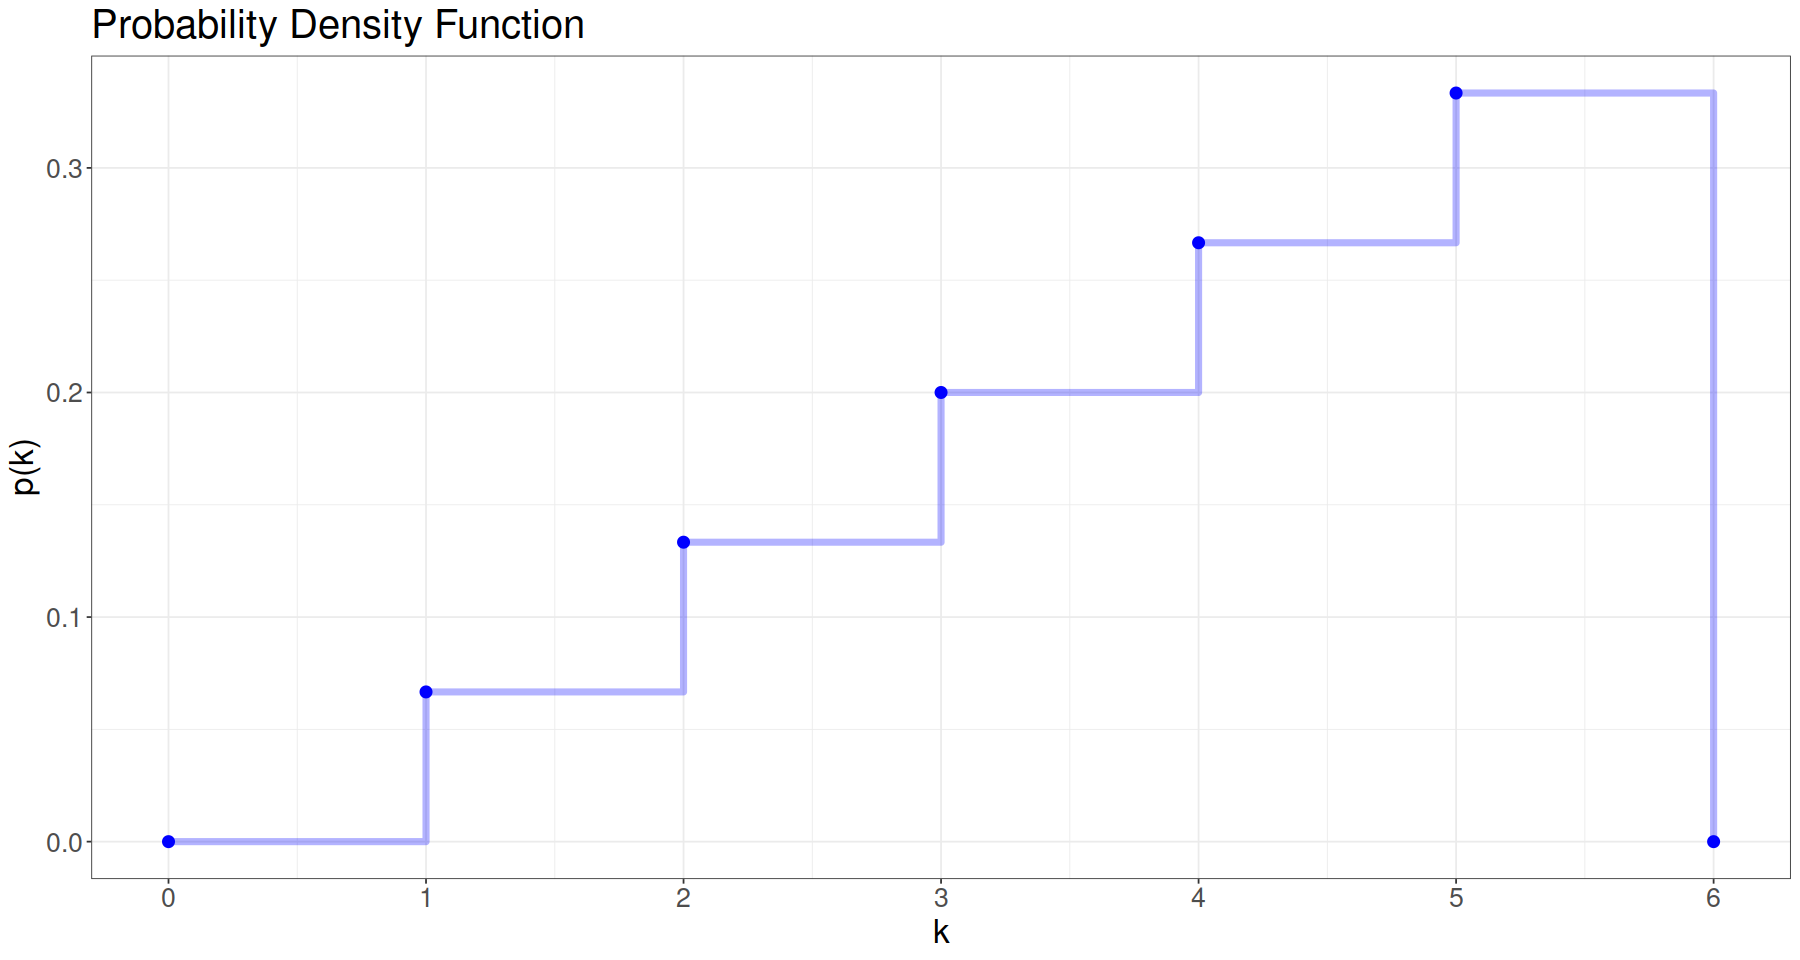

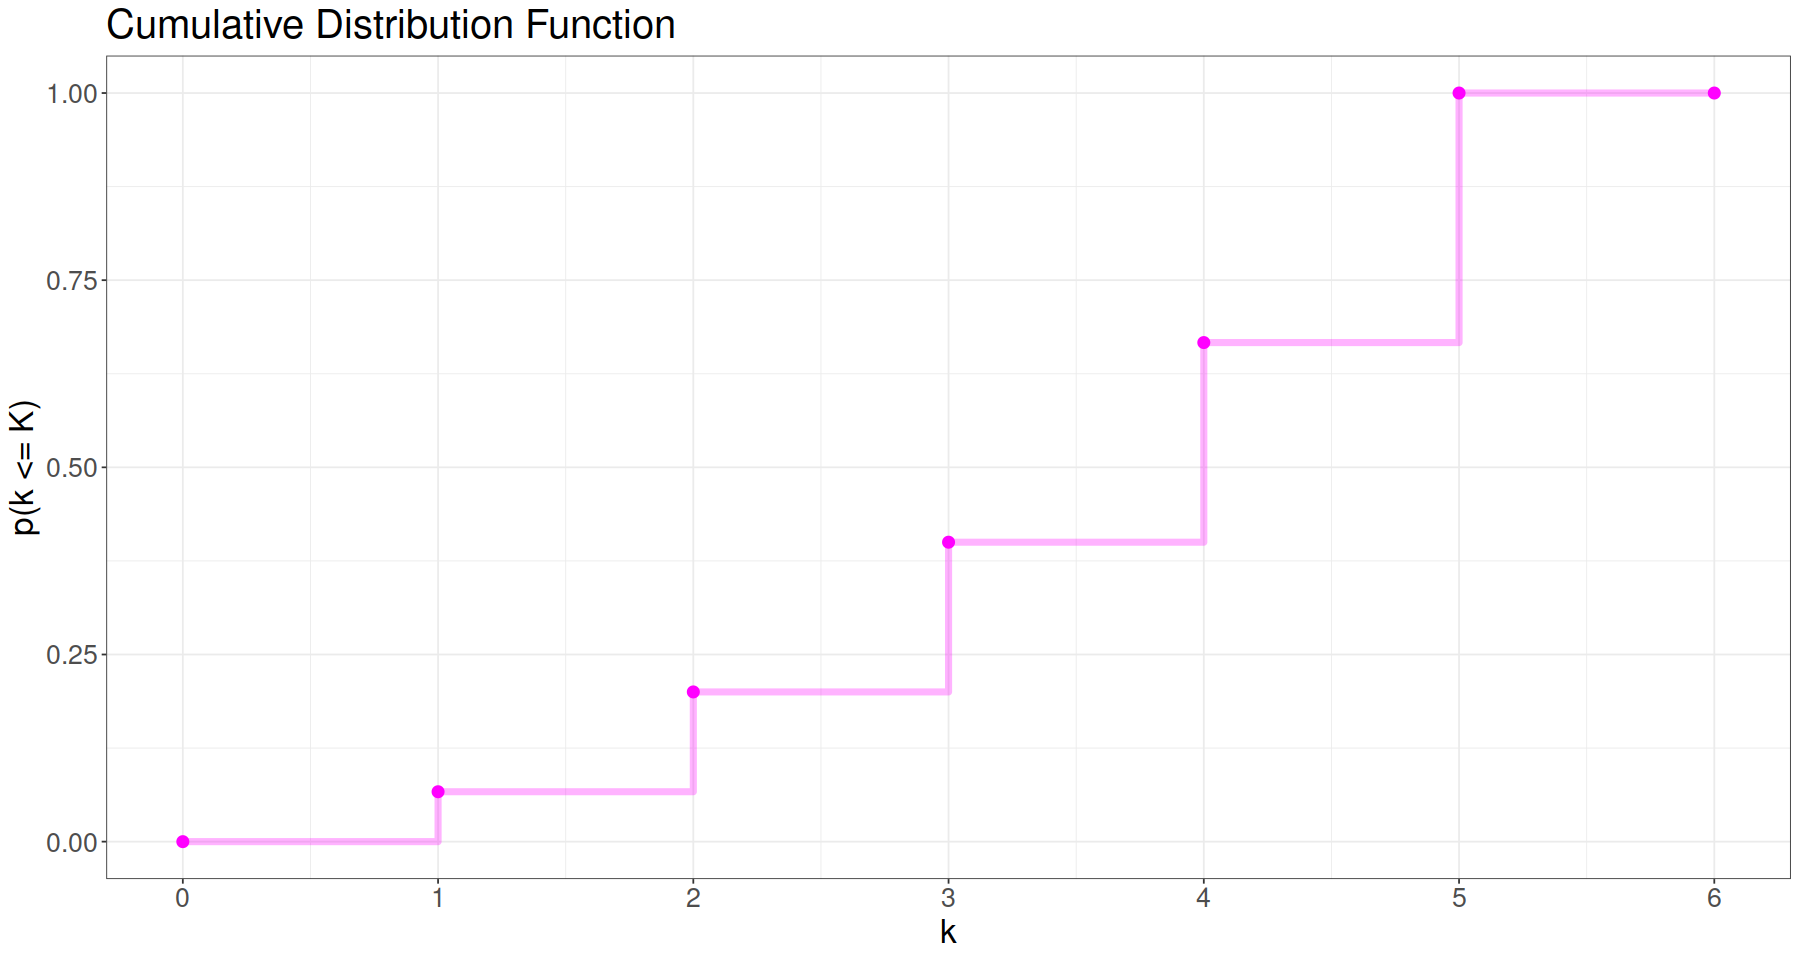

In [3]:
k_range = 0:6

p1 <- ggplot() + theme_bw() + geom_point(aes(x = k_range, y = dfunc(k_range)), colour = 'blue', size = 3) + 
    geom_step(aes(x = k_range, y = dfunc(k_range)), colour = 'blue', alpha = 0.3, linewidth = 2) +
    scale_x_continuous(breaks = k_range) + 
    labs(x = 'k', y = 'p(k)', title = 'Probability Density Function') + 
    theme(text = element_text(size = 20))
p1

# plot(k_range, dfunc(k_range), pch = 16, cex = 1.5, col = 'navy', main = 'PDF')
# lines(k_range, dfunc(k_range), col = alpha('blue', 0.3) , lwd = 7, type = 's')

p1 <- ggplot() + theme_bw() + geom_point(aes(x = k_range, y = pfunc(k_range)), colour = 'magenta', size = 3) + 
    geom_step(aes(x = k_range, y = pfunc(k_range)), colour = 'magenta', alpha = 0.3, linewidth = 2) +
    scale_x_continuous(breaks = k_range) +
    labs(x = 'k', y = 'p(k <= K)', title = 'Cumulative Distribution Function') + 
    theme(text = element_text(size = 20))
p1

## Request no. 3

Compute, using R, the mean value and variance of the probability distribution.

In [4]:
# define a function that allows to calculate the expectation value for every variable that is a function of k

exp_dvalues <- function(func, range, var) {
    out <- sum(var * do.call(func, list(range)))
}

# compute mean value

mu <- exp_dvalues(dfunc, k_range, k_range)
cat('The mean value of the distribion is: ', round(mu, 2), '\n')

# compute variance

sigma = exp_dvalues(dfunc, k_range, (k_range - mu) ** 2)
cat('The variance of the distribion is: ', round(sigma, 2))

The mean value of the distribion is:  3.67 
The variance of the distribion is:  1.56

## Request no. 4

Compute, using R, the expected value $\text{E}[k(6-k)]$

In [5]:
e_val = exp_dvalues(dfunc, k_range, k_range * (6 - k_range))
cat('The expected value of the specified variable is: ', round(e_val, 2))

The expected value of the specified variable is:  7

## Request no. 5

Write the R function that allows to sample random numbers from the probability distribution.

In [6]:
rfunc <- function(n, range) {
    samples <- numeric(n)
    values <- pfunc(range)
    for (i in 1:n) {
        num <- runif(1)
        ind <- which(values >= num)
        samples[i] <- range[min(ind)]
    }
    return(samples)
}

## Request no. 6

Using the implemented function (point (5)), sample $10^5$ random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers).

In [7]:
samples <- rfunc(10 ** 5, k_range)
samples <- as_tibble(table(samples))
samples <- samples %>% mutate(samples = as.integer(samples)) %>% mutate(freq = n / sum(n))
samples

samples,n,freq
<int>,<int>,<dbl>
1,6636,0.06636
2,13362,0.13362
3,19927,0.19927
4,26463,0.26463
5,33612,0.33612


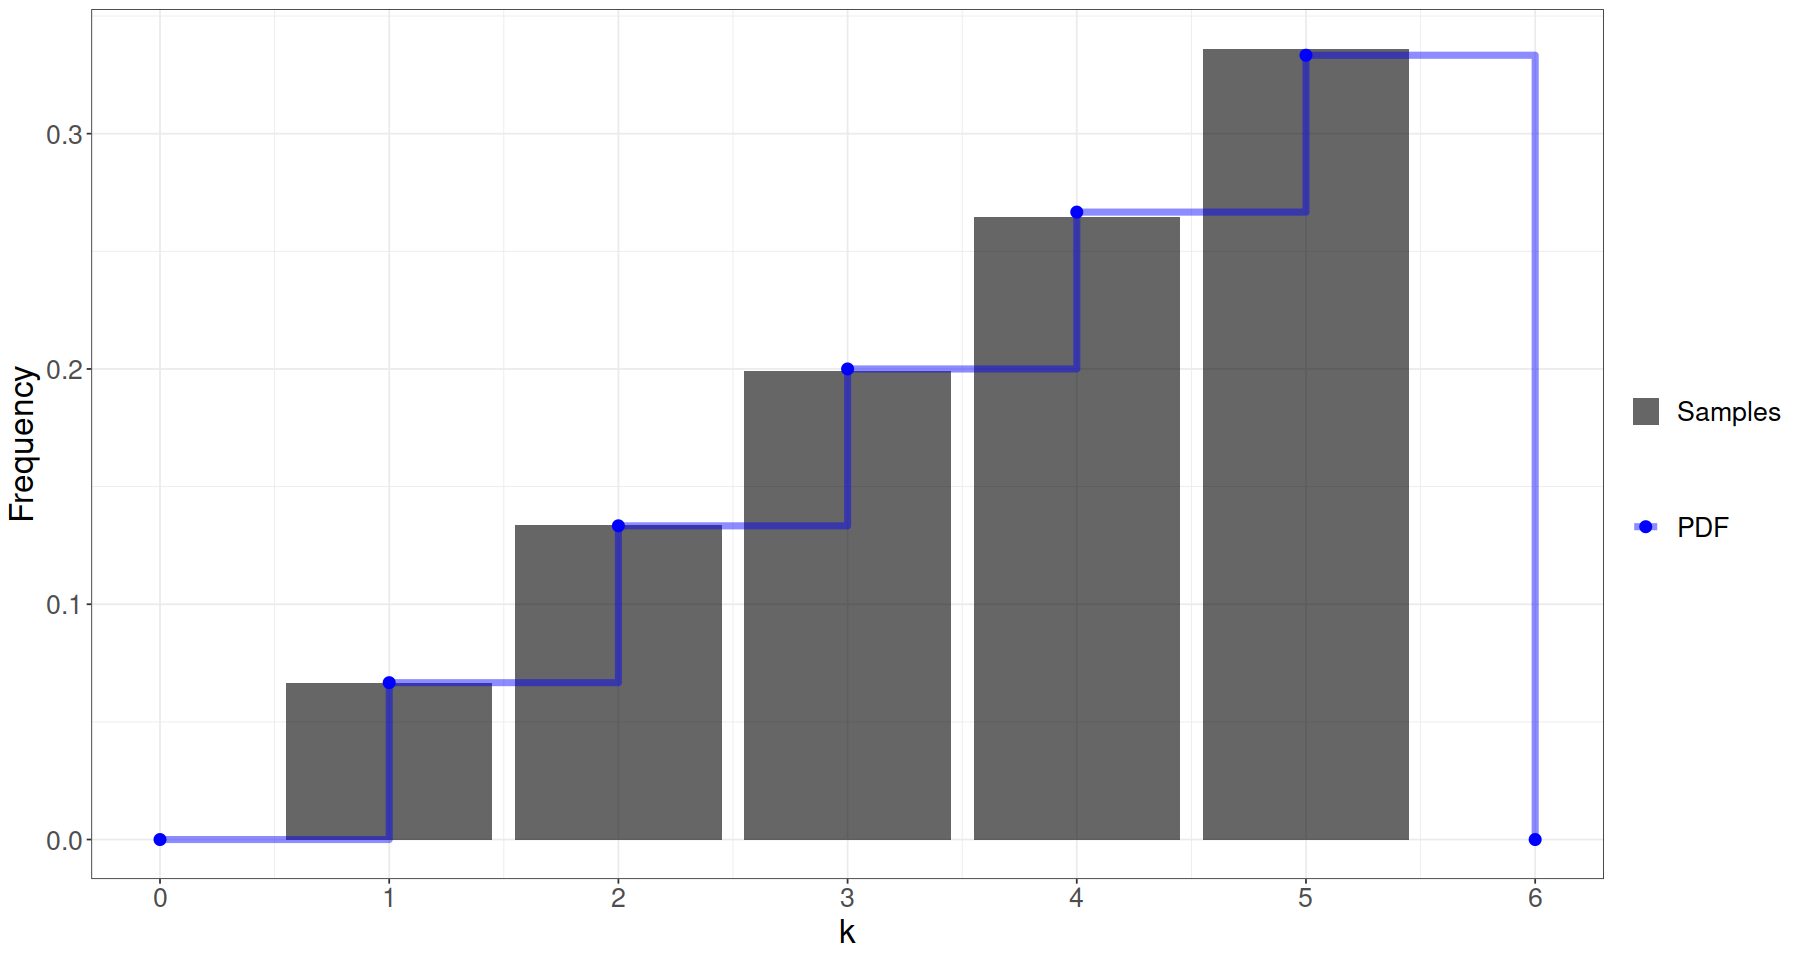

In [8]:
cols <- c('PDF' = "blue", 'Samples' = "black")
p1 <- ggplot() + theme_bw() + geom_bar(data = samples, aes(x = samples, y = freq, fill = 'Samples'), alpha = 0.6, stat = 'identity') + 
    geom_point(aes(x = k_range, y = dfunc(k_range), colour = 'PDF'), size = 3) + 
    geom_step(aes(x = k_range, y = dfunc(k_range), colour = 'PDF'), linewidth = 2, alpha = 0.45) +
    scale_x_continuous(breaks = k_range) + 
    labs(x = 'k', y = 'Frequency') + 
    scale_colour_manual(name = '', values = cols) +
    scale_fill_manual(name = '', values = cols) + 
    theme(text = element_text(size = 20)) 
p1

# Exercise 2 - Continuous random variable

The triangular distribution, in the interval $(a, b)$, is given by the following:

$$
f(X) = \begin{cases}
    \frac{2(x-a)}{(b-a)(c-a)} & \text{for } a \le x < c, \\[4pt]
    \frac{2(b-x)}{(b-a)(b-c)} & \text{for } c \le x \le b, \\[4pt]
    0 & \text{otherwise}
\end{cases}   
$$

where $c \in [a,b]$.

## Request (a)

Plot the function, given the interval $(a, b)$.

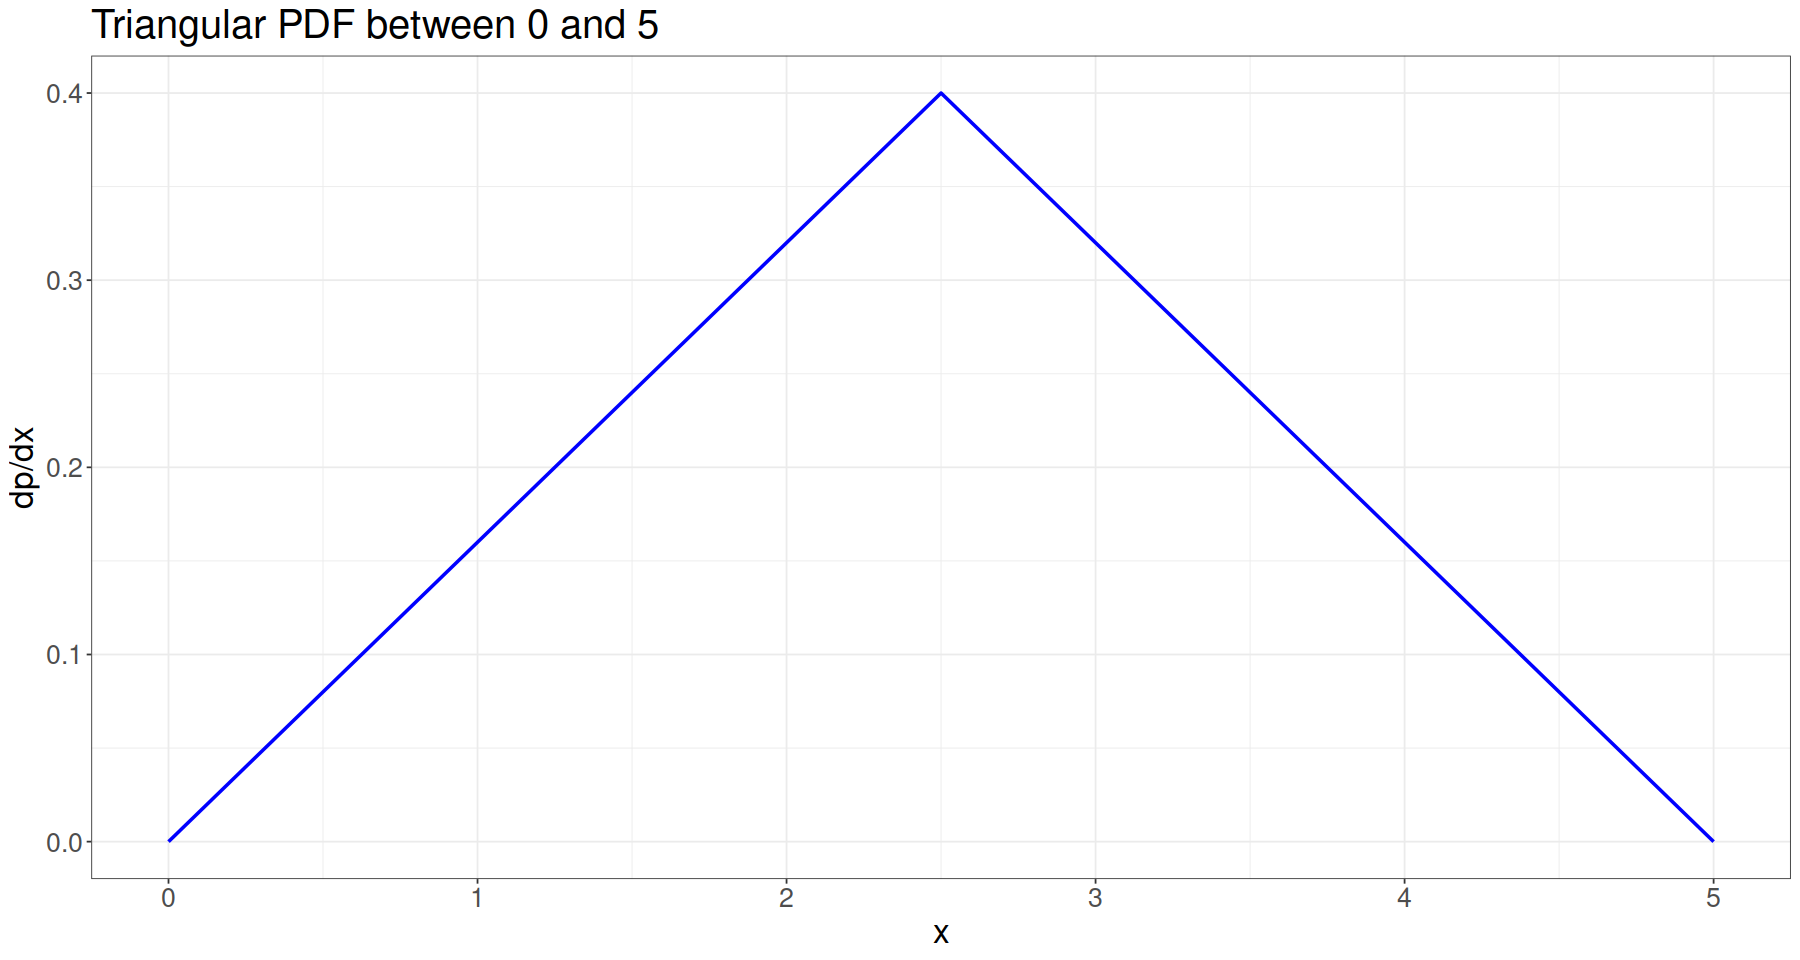

In [9]:
d_triang <- function(x, a, b) {
    c = (a + b) / 2
    values <- numeric(length(x))
    for (i in 1:length(x)) {
        if (x[i] >= a & x[i] < c) {
            values[i] <- (2 * (x[i] - a)) / ((b - a) * (c - a))
        }
        else if (x[i] >= c & x[i] <= b) {
            values[i] <- (2 * (b - x[i])) / ((b - a) * (b - c))
        }
        else {
           values[i] <- 0
        }
    }
    return(values)
}


a <- 0
b <- 5
x_range <- seq(a, b, length.out = 100)

p1 <- ggplot() + theme_bw() + 
    stat_function(fun = d_triang, args = list(a = a, b = b), colour = 'blue', linewidth = 1, xlim = c(a, b)) +
    labs(x = 'x', y = 'dp/dx', title = paste('Triangular PDF between ', a, ' and ', b, sep = '')) + 
    theme(text = element_text(size = 20))
p1

## Request (b)

And write an algorithm to generate random numbers from the triangular distribution.


The following function generates random samples from the triangular distribution with the acceptance/rejection method (used in order to explore different options from the one reported on the slides regarding sampling from the triangular distribution).

In [10]:
r_triang <- function(n, a, b) {
    values <- c()
    
    while(length(values) != n) {
        x <- runif(1, a, b)
        y <- runif(1, 0, 2 / (b - a))
        y_triang <- d_triang(x, a, b)
        if (y <= y_triang) {
            values <- c(values, x)
        }
    }

    return(values)
}

samples <- r_triang(10 ** 4, a, b)

## Request (c)

Generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve.

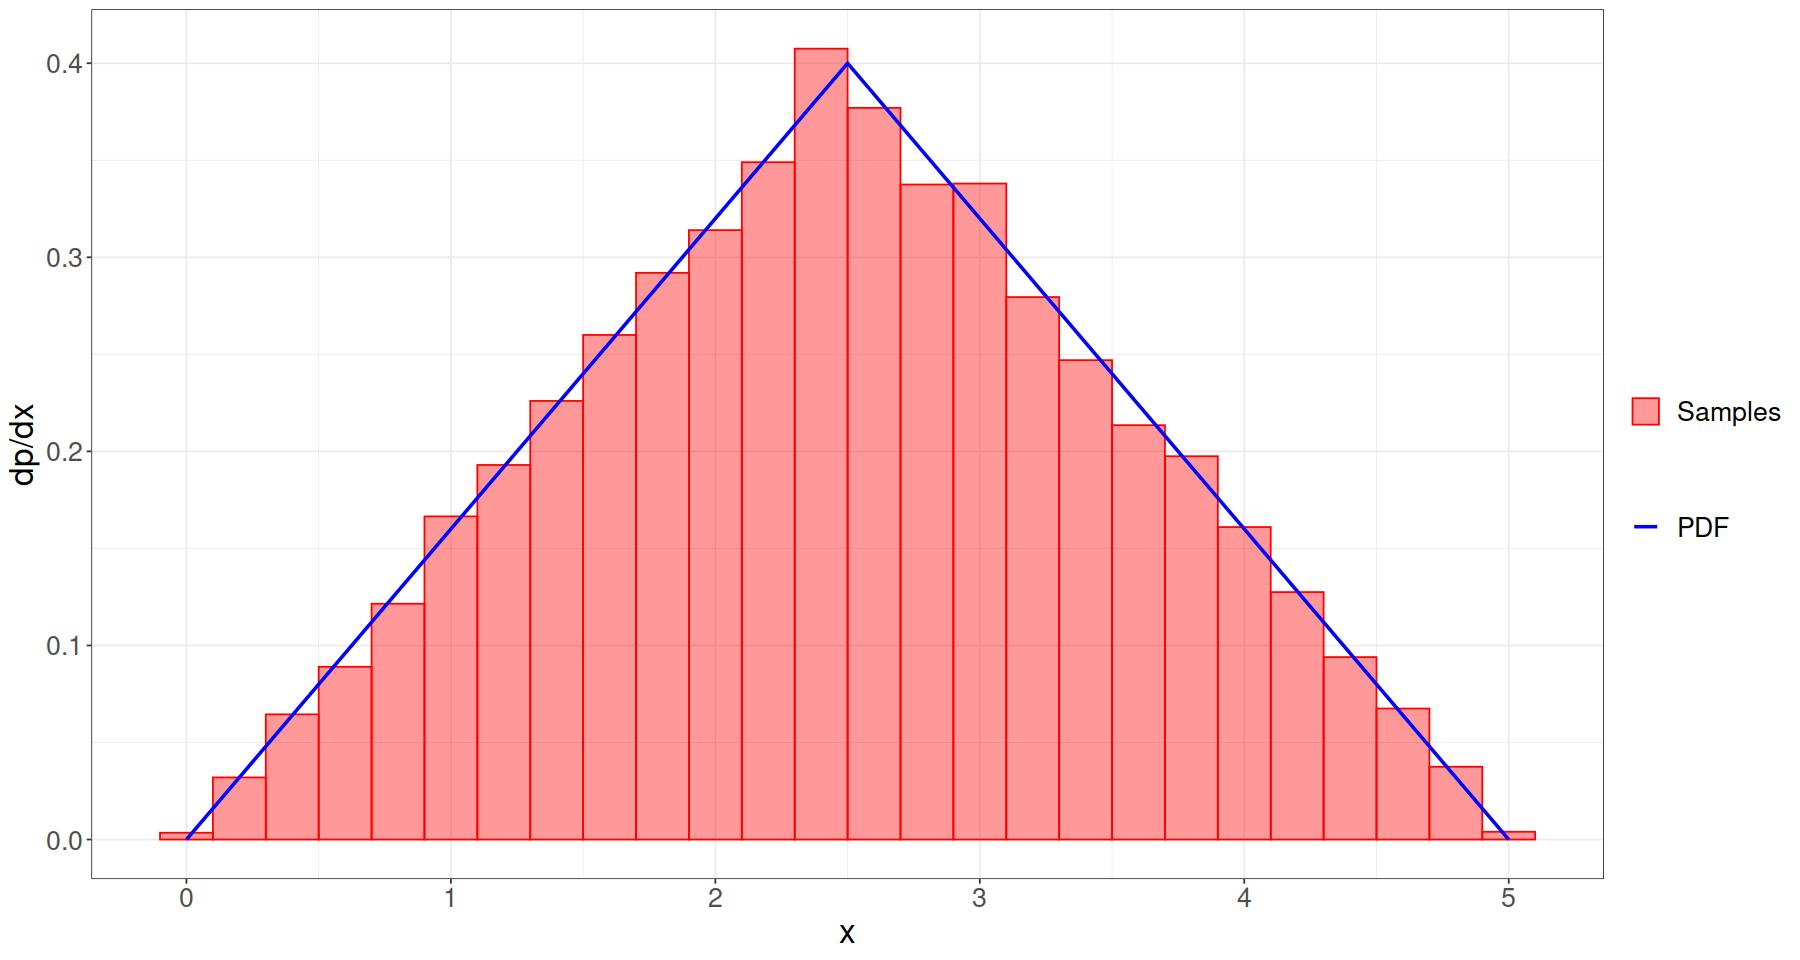

In [11]:
cols <- c('PDF' = 'blue', 'Samples' = 'red')
p1 <- ggplot() + theme_bw() + geom_histogram(aes(x = samples, y = after_stat(density), fill = 'Samples'), colour = 'red', alpha = 0.4, binwidth = 0.2) +
    stat_function(fun = d_triang, args = list(a = a, b = b), aes(colour = 'PDF'), linewidth = 1, xlim = c(a, b)) +
    labs(x = 'x', y = 'dp/dx') + 
    scale_colour_manual(name = '', values = cols) +
    scale_fill_manual(name = '', values = cols) +
    theme(text = element_text(size = 20))
p1

# Exercise 3

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential PDF with rate $1/30$.

## Request (a)

Simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram.

In [12]:
lambda <- 1 / 30
n = 60
samples <- rexp(n, rate = lambda)

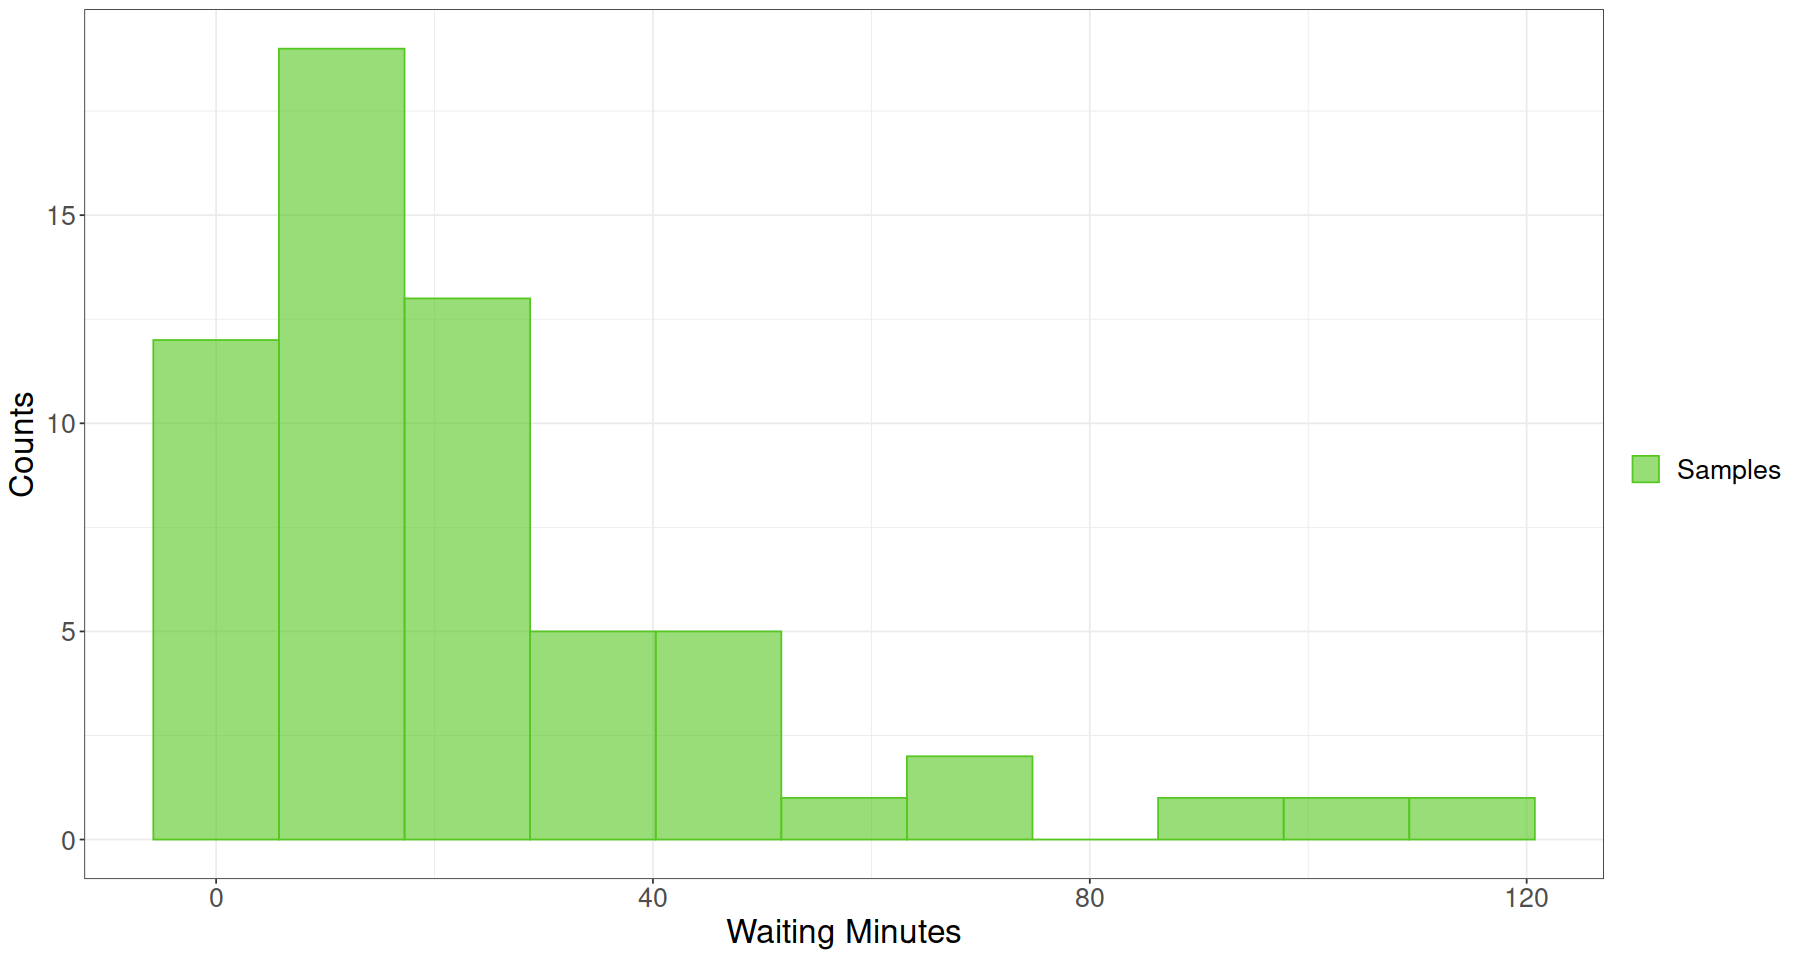

In [13]:
bin_width = 11.5
cols <- c('Samples' = "#55c720")
p1 <- ggplot() + theme_bw() + geom_histogram(aes(x = samples, fill = 'Samples'), colour = '#55c720', alpha = 0.6, binwidth = bin_width) +
    labs(x = 'Waiting Minutes', y = 'Counts') + 
    scale_fill_manual(name = '', values = cols) +
    theme(text = element_text(size = 20))
p1

## Request (b)

What is the probability that a person will wait for less than 12 minutes?

Given ```pexp(q,rate)``` the R function for the exponential CDF, we know that ```pexp(q = 12,rate = lambda)``` returns the probability that $q$ is less or equal than 12, i.e. 
$p(q \le 12)$, assuming that $q$ is a random variable that follows the considered exponential distribution.

In [14]:
prob <- pexp(12, rate = lambda)
cat('The probability that a person will wait for less than 12 minutes is ', round(prob * 100, 2), '%', sep = '')

The probability that a person will wait for less than 12 minutes is 32.97%

## Request (c)

Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R).

In [15]:
# evaluate mean value from theory

th_expval <- 1 / lambda
cat('The average waiting time calculated from theory is ', th_expval, ' minutes.', sep = '', '\n')

# evaluate mean value from simulated data

sim_expval <- mean(samples)
cat('The average waiting time calculated from simulated data is ', round(sim_expval, 2), ' minutes.', 
    ' Differs ', round((abs(th_expval - sim_expval) / th_expval) * 100, 2), '% from the theoretical value.', sep = '', '\n')

#evaluate mean value from R functions manipulation

r_expval_integral <- integrate(function(x) {x * dexp(x, rate = lambda)}, lower = 0, upper = Inf)
r_expval <- r_expval_integral$value
cat('The average waiting time calculated from R functions manipulation is ', r_expval, ' minutes.', 
    ' Differs ', round((abs(th_expval - r_expval) / th_expval) * 100, 2), '% from the theoretical value.', sep = '')

The average waiting time calculated from theory is 30 minutes.
The average waiting time calculated from simulated data is 24.28 minutes. Differs 19.06% from the theoretical value.
The average waiting time calculated from R functions manipulation is 30 minutes. Differs 0% from the theoretical value.

## Request (d)

What is the probability for waiting more than one hour before being received?

Given ```pexp(q,rate)``` the R function for the exponential CDF, we know that ```pexp(q = 60,rate = lambda)``` returns the probability that $q$ is less or equal than 60, i.e. 
$p(q \le 60)$, assuming that $q$ is a random variable that follows the considered exponential distribution. So the required answer is given by $1-$ ```pexp(q = 60,rate = lambda)```.

In [16]:
prob <- 1 - pexp(60, rate = lambda)
cat('The probability that a person will wait for at least an hour is ', round(prob * 100, 2), '%', sep = '')

The probability that a person will wait for at least an hour is 13.53%

# Exercise 4 - Multiple choices exam

- The final exam of a course is given to the students in the format of a multiple choice written test: for each questions there are five possible alternatives
- A student either knows the answer, or selects randomly the answer among the five possible choices
- Assuming $p = 0.7$ the probability that the student knows the answer, once a correct answer is given, what it the probability that the student really knew the correct answer?
- Write a small R program to provide the answer

This problem can be addressed with the Bayes Theorem. A possibile formulation that suits well for our purpose is the following:

$$
    p(A|B) = \frac{p(B|A) \cdot p(A)}{p(B|A) \cdot p(A) + p(B|\bar{A}) \cdot p(\bar{A})}
$$

where, in our case:
- $p(A|B)$ is the required posterior, i.e. the probability that the student really knew the answer provided that the answer is correct
- $p(B|A) = 1$ is the likelihood, i.e. the probability that the answer is correct given that the student knows the answer
- $p(A) = 0.7$ is the prior, given in the text of the problem
- $p(B) = p(B|A) \cdot p(A) + p(B|\bar{A}) \cdot p(\bar{A}) = 1 \cdot 0.7 + (1 / 5) \cdot (1 - 0.7) = 0.76$ is the probability of giving the correct answer, which depends on whether or
    not the student knwos the answer of that particular question

In [17]:
p <- 0.7
n_options <- 5

post_calculator <- function(p, n_options) {
    p_B_A <- 1 # the probability that the answer is correct knowing that the student knows the answer is 1
    p_A <- p # the probability that the student knows the answer is given as an input
    p_B <- (1 / n_options) * (1 - p_A) + 1 * p_A # the probability that the answer is correct is 1 / number of options available
                                                # if the student does not know the answer but it's 1 if the student knows the
                                                # answer
    p_A_B <- (p_B_A * p_A) / p_B
    return(p_A_B)
}

post <- post_calculator(p = p, n_options = n_options)
cat('The probability that the student really knows the answer given that the answer is correct is: ', round(post * 100, 2), '%', sep = '')

The probability that the student really knows the answer given that the answer is correct is: 92.11%

# Exercise 5 - Waiting time

Starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma Termini. We assume there is always an available seat on a train leaving from Milano.
Assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability that she has to wait:

- at most 10 minutes
- at least 15 minutes
- what is the average time spent waiting?

First, I create a vector called ```minutes``` that stores POSIX objects for each minute from 10:45 to 11:45. Then, I define the time of arrival of the three trains that are significative in our time span. Eventually I compute the waiting time correspontent to each entry of ```minutes``` and store it into the vector ```waitings```. An **important detail** is that if the person arrives at exactly the departure minute of ```train1``` or ```train2``` this means that the person will not be able to catch the train and so she has to wait the next one.

In [18]:
arrival <- strptime('10:45', '%H:%M')
minutes <- seq(from = arrival, length.out = 60, by = 'mins')

train1 <- strptime('11:00', '%H:%M')
train2 <- strptime('11:30', '%H:%M')
train3 <- strptime('12:00', '%H:%M')

waitings <- c()
for (time in minutes) {
    posixlt_time <- as.POSIXlt(time, origin = '1970-01-01')
    if (posixlt_time < train1) {
        target <- train1 - posixlt_time
    } else if (posixlt_time < train2) {
        target <- train2 - posixlt_time
    } else {
        target <- train3 - posixlt_time
    }
    waitings <- c(waitings, target)
}

print(waitings)

 [1] 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1 30 29 28 27 26 25 24 23 22 21
[26] 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1 30 29 28 27 26
[51] 25 24 23 22 21 20 19 18 17 16


## Request (a)

Compute the probability that the person has to wait at most 10 minutes.

It is possible to notice that among all the 60 minutes in which the person could arrive at the train station, those that provide a waiting time less or equal than 10 minutes are as many as the length of ```waitings``` after it has been filtered by keeping only the elements less or equal than 10.

In [19]:
p_lt10 <- length(waitings[which(waitings <= 10)]) / length(minutes)
cat('The probability that the person will wait at most 10 minutes is ', round(p_lt10 * 100, 2), '%', sep = '')

The probability that the person will wait at most 10 minutes is 33.33%

## Request (b)

Compute the probability that the person has to wait at least 15 minutes.

The same observations made fot the previous question hold.

In [20]:
p_gt15 <- length(waitings[which(waitings >= 15)]) / length(minutes)
cat('The probability that the person will wait at least 15 minutes is ', round(p_gt15 * 100, 2), '%', sep = '')

The probability that the person will wait at least 15 minutes is 53.33%

## Request (c)

Compute the the average time spent waiting.

To do so I first find the unique values in ```waitings```, then count the number of occurrencies for each of those in order to compute their probability, and finally I apply the definition of average value by summing over all unique ```waitings``` element multiplied by their probability.

In [21]:
sum <- 0
for (w in unique(waitings)) {
    no_w <- length(waitings[which(waitings == w)])
    sum <- sum + w * (no_w / length(waitings))
}
cat('The average minutes spent waiting are ', round(sum, 2), sep = '')

The average minutes spent waiting are 15.5

## Exercise 6

- The annual return rate for a specific stock on the market is a normal variable with a 10% mean anda 12% standard deviation
- Mr X decides to buy 200 share of that specific stock at a price of 85€ per share
- What is the probability that after a year his net profit from the investment is at least 800€?
- (suppose there are no transaction costs and that there are no annual dividend for the stock)

Mr X will get a net profit of 800€ if his shares will have a 4.71% return, and this could happen with a probability of 67.05%.

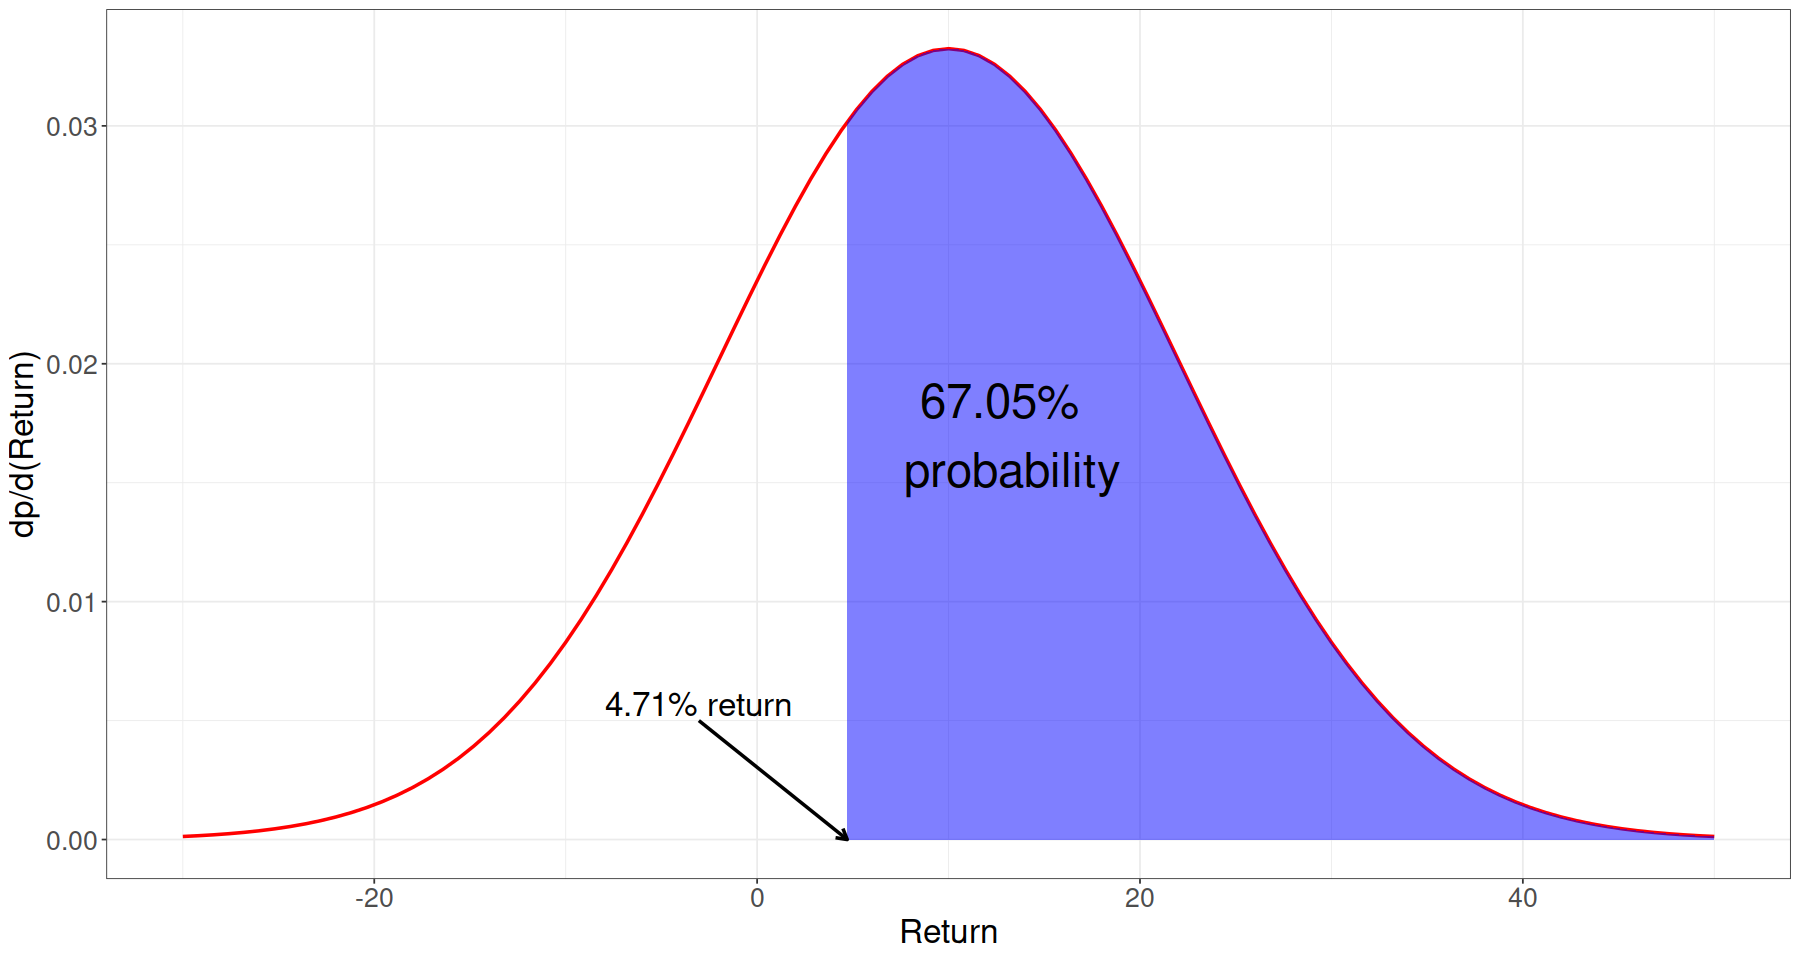

In [22]:
shares <- 200
share_cost <- 85
investment <- shares * share_cost
avg_return <- 10
std_return <- 12
hyp_profit <- 800

profit_prob <- function(profit, inv, avg_r, std_r) {
    return <- (profit / inv) * 100
    return_prob <- 1 - pnorm(return, avg_return, std_return)
    return(c(return, return_prob))
}

prob <- profit_prob(profit = hyp_profit, inv = investment, avg_r = avg_return, std_r = std_return)
cat('Mr X will get a net profit of ', hyp_profit, '€ ', 'if his shares will have a ', 
    round(prob[1], 2), '% return, and this could happen with a probability of ', round(prob[2] * 100, 2), '%.', sep = '')

p1 <- ggplot() + theme_bw() + stat_function(fun = dnorm, args = list(mean = avg_return, sd = std_return), colour = 'red', linewidth = 1, xlim = c(-30, 50)) +
    stat_function(fun = dnorm, args = list(mean = avg_return, sd = std_return), fill = 'blue', geom = 'area', alpha = 0.5, xlim = c(prob[1], 50)) +
    annotate("text", x=13, y=0.017, label = paste(round(prob[2] * 100, digits = 2), '% \n probability', sep = ''), size = 10) +
    labs(x = 'Return', y = 'dp/d(Return)') + 
    geom_segment(aes(x = prob[1] - 7.75, y = 0.005, xend = prob[1], yend = 0), arrow = arrow(length = unit(0.25, "cm")), linewidth = 1) +
    annotate("text", x = prob[1] - 7.75, y = 0.0057, label = paste(round(prob[1], digits = 2), '%', ' return',sep = ''), size = 7) +
    theme(text = element_text(size = 20))
p1